In [1]:
import polars as pl
import polars.selectors as cs
from plotnine import *

In [3]:
ut = pl.read_csv("https://raw.githubusercontent.com/lindahartman/LUDataLiteracy/refs/heads/main/data/utrecht_2025.csv", try_parse_dates=True)
kc = pl.read_csv("https://raw.githubusercontent.com/lindahartman/LUDataLiteracy/refs/heads/main/data/kc_house_data.csv", try_parse_dates=True)

In [5]:
ut.columns

['id',
 'zip_code4',
 'zip_code6',
 'zip_code6_id',
 'house_type',
 'lot_area',
 'house_area',
 'garden_size',
 'rooms',
 'bathrooms',
 'x_coor',
 'y_coor',
 'build_year',
 'retail_value',
 'asking_price',
 'energy_label',
 'energy_eff',
 'valuation_date',
 'street',
 'subdistrict',
 'district',
 'city',
 'dist_from_train']

# Challenge 1

In [8]:
(
    ut
    .select(pl.col("garden_size").mean())
)

garden_size
f64
29.87234


In [10]:
(
    ut
    .select(pl.col("dist_from_train").median())
)

dist_from_train
f64
2.68


# Challenge 2

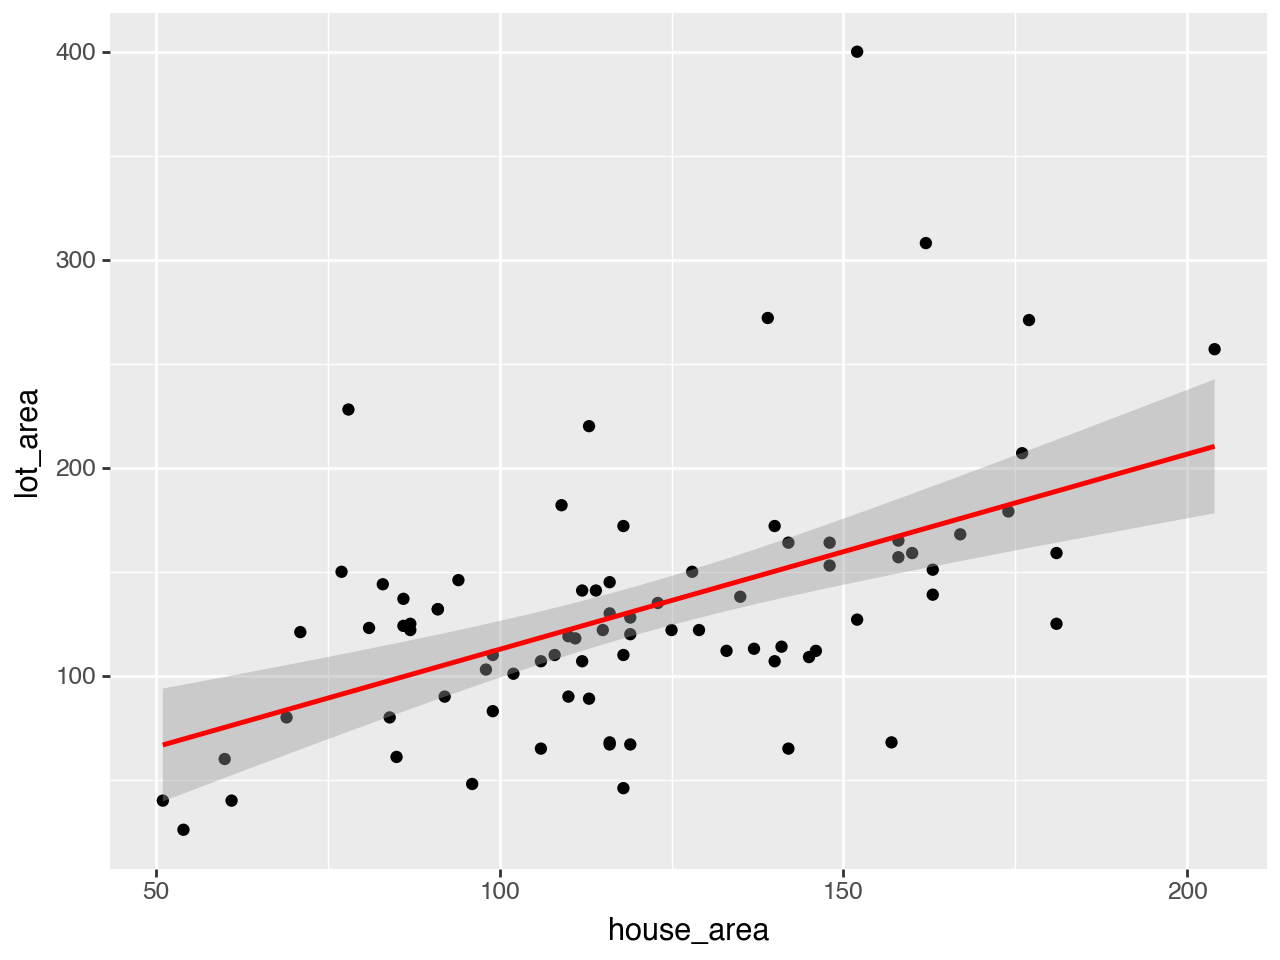

In [23]:
(
    ut
    .filter(pl.col("house_type")=="woonhuis")
    .pipe(ggplot, aes(x="house_area", y="lot_area"))
    + geom_point()
    + geom_smooth(method="lm", color="red")
)

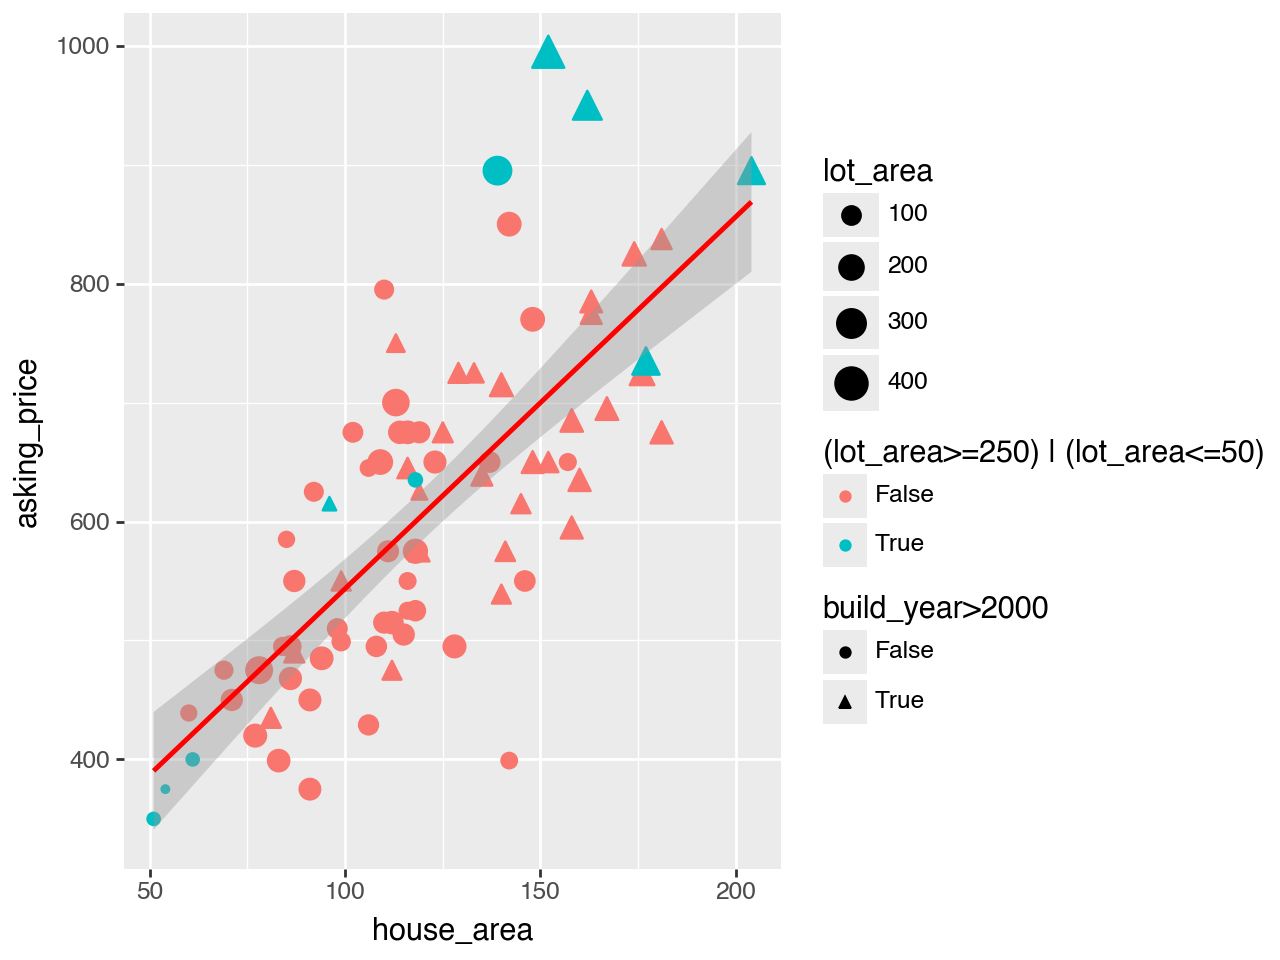

In [44]:
(
    ut
    .filter(pl.col("house_type")=="woonhuis")
    .pipe(ggplot, aes(x="house_area", y="asking_price"))
    + geom_point(aes(size="lot_area", color="(lot_area>=250) | (lot_area<=50)", shape="build_year>2000"))
    + geom_smooth(method="lm", color="red")
)

In [46]:
(
    ut
    .filter(pl.col("asking_price")>920)
)

id,zip_code4,zip_code6,zip_code6_id,house_type,lot_area,house_area,garden_size,rooms,bathrooms,x_coor,y_coor,build_year,retail_value,asking_price,energy_label,energy_eff,valuation_date,street,subdistrict,district,city,dist_from_train
i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,f64,i64,i64,f64,str,i64,date,str,str,str,str,f64
5079,3543,"""3543GC""","""3543GC079""","""woonhuis""",400,152,null,4,1,52.1026,5.0533,2017,1050,995.0,"""A""",1,2024-11-04,"""CG Sigmund Rombergstraat""","""Terwijde-De Wetering""","""Leidsche Rijn""","""Utrecht""",4.18
5080,3543,"""3543DR""","""3543DR080""","""woonhuis""",308,162,75,6,1,52.1058,5.0475,2007,1015,950.0,"""A""",1,2024-09-19,"""Jule Stynestraat""","""Terwijde-De Wetering""","""Leidsche Rijn""","""Utrecht""",4.68


# Challenge 4

In [49]:
ut.head(0).glimpse()

Rows: 0
Columns: 23
$ id               <i64> 
$ zip_code4        <i64> 
$ zip_code6        <str> 
$ zip_code6_id     <str> 
$ house_type       <str> 
$ lot_area         <i64> 
$ house_area       <i64> 
$ garden_size      <i64> 
$ rooms            <i64> 
$ bathrooms        <i64> 
$ x_coor           <f64> 
$ y_coor           <f64> 
$ build_year       <i64> 
$ retail_value     <i64> 
$ asking_price     <f64> 
$ energy_label     <str> 
$ energy_eff       <i64> 
$ valuation_date  <date> 
$ street           <str> 
$ subdistrict      <str> 
$ district         <str> 
$ city             <str> 
$ dist_from_train  <f64> 



In [57]:
# We want houses in 3543 zip_code4
(
    ut
    .filter(pl.col("zip_code4")==3543)
    .select("zip_code4", "street", "house_area", "lot_area", "build_year", "energy_label", "asking_price")
    .sort("build_year", descending=False)
)
# There are 5 houses in 3543 zip_code4. The oldest house is built on the street: Leo Fallplantsoen

zip_code4,street,house_area,lot_area,build_year,energy_label,asking_price
i64,str,i64,i64,i64,str,f64
3543,"""Leo Fallplantsoen""",81,123,2001,"""A""",435.0
3543,"""Leo Fallplantsoen""",176,207,2004,"""A""",725.0
3543,"""Jule Stynestraat""",162,308,2007,"""A""",950.0
3543,"""Jule Stynestraat""",174,179,2007,"""A""",825.0
3543,"""CG Sigmund Rombergstraat""",152,400,2017,"""A""",995.0


# Challenge 5

In [63]:
ut.n_unique("zip_code4")

26

In [ ]:
(
    ut
    .group_by("zip_code4")
    .agg(unique_streets = pl.col("street").n_unique())
    .sort("unique_streets", descending=True)
)
# zip_code4 with must unique streets is 3544

zip_code4,unique_streets
i64,u32
3544,5
3452,4
3553,3
3543,3
3526,2
…,…
3513,1
3581,1
3531,1


In [ ]:
(
    ut
    .filter(pl.col("zip_code4")==3544, pl.col("house_type")=="woonhuis")
    .sort("dist_from_train", descending=True)
    .head(1)
)
# The street name of the house closest to the station is Kees van Bohemenhof

id,zip_code4,zip_code6,zip_code6_id,house_type,lot_area,house_area,garden_size,rooms,bathrooms,x_coor,y_coor,build_year,retail_value,asking_price,energy_label,energy_eff,valuation_date,street,subdistrict,district,city,dist_from_train
i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,f64,i64,i64,f64,str,i64,date,str,str,str,str,f64
5000,3544,"""3544MC""","""3544MC000""","""woonhuis""",127,152,41,5,1,52.0986,5.0391,2007,766,650.0,"""A+""",1,2024-05-01,"""Kees van Bohemenhof""","""Het Zand-Parkwijk-Langerak""","""Leidsche Rijn""","""Utrecht""",4.98


# Challenge 6

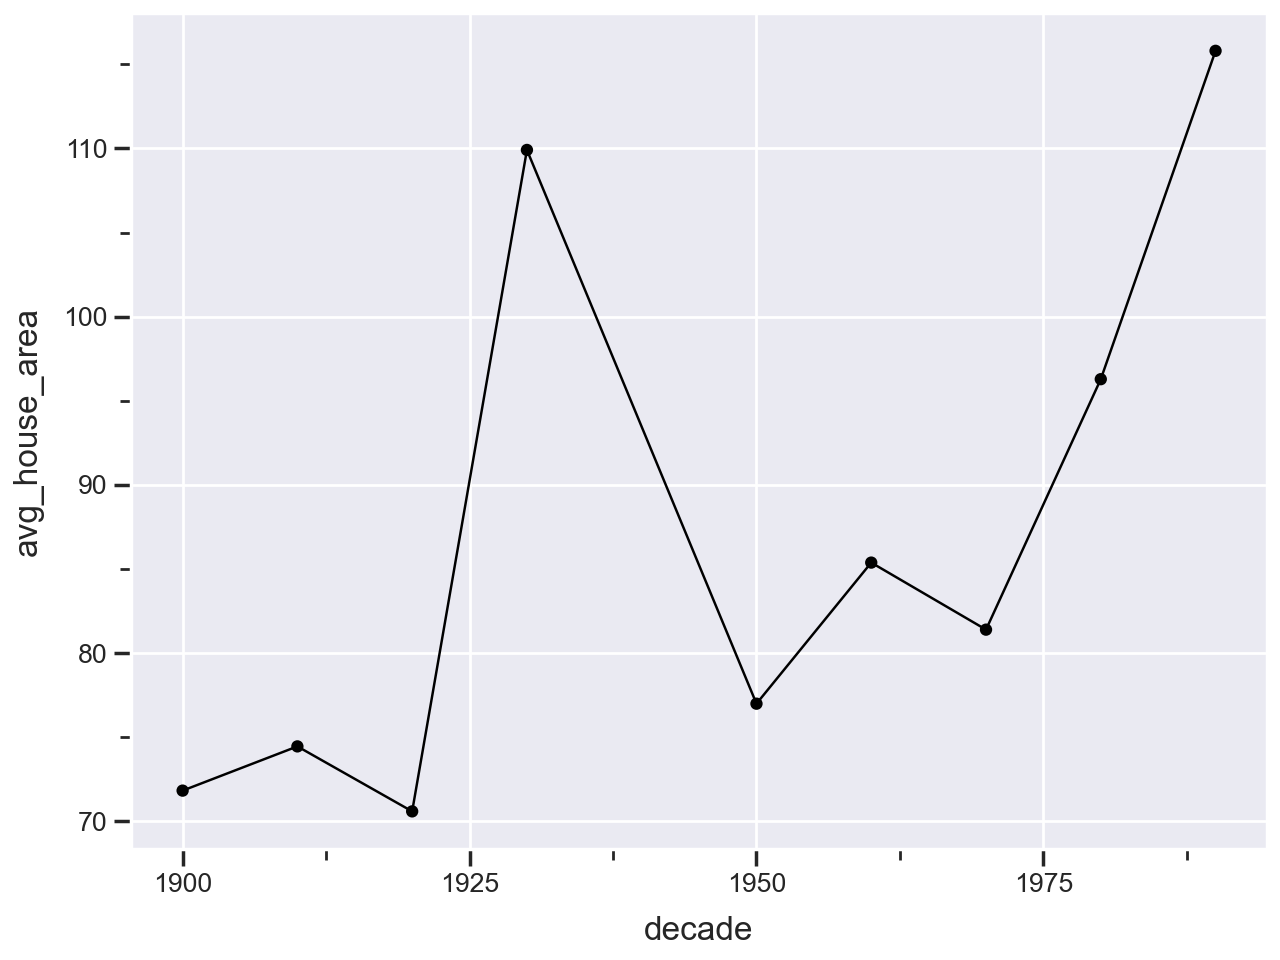

In [94]:
(
    ut
    .filter((pl.col("build_year")<2000), (pl.col("build_year") >= 1900))
    .with_columns(((pl.col("build_year")// 10) * 10).alias("decade"))
    .group_by("decade")
    .agg(avg_house_area=pl.col("house_area").mean())
    .sort("decade")
    .pipe(ggplot, aes(x="decade", y="avg_house_area"))
    + geom_line()
    + geom_point()
    + theme_seaborn()
    
)

# Challenge 8

In [106]:
(
    ut
    .group_by("street", "energy_eff")
    .agg(n_houses=pl.len(), old=pl.col("build_year").min())
    .sort("n_houses", descending=True)
    .with_columns(prop_houses=(pl.col("n_houses")/pl.col("n_houses").sum())
                  .over("street"))
    .filter(pl.col("energy_eff")==1)
)

street,energy_eff,n_houses,old,prop_houses
str,i64,u32,i64,f64
"""Voorsterbeeklaan""",1,10,2005,1.0
"""Eyckenstein""",1,6,2006,1.0
"""Europaplein""",1,5,2008,0.714286
"""Pablo Picassostraat""",1,5,2007,1.0
"""Dassenburcht""",1,4,2017,1.0
…,…,…,…,…
"""Socrateslaan""",1,1,1933,0.5
"""Anna van Burendreef""",1,1,2002,1.0
"""Zandooghof""",1,1,2001,1.0
